In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Erick\AppData\Local\Temp\ipykernel_18100\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [102]:
rimac_df = pd.read_csv("rimac.csv")

In [3]:
rimac_df.columns

Index(['date', ' time', ' busyness'], dtype='object')

In [103]:
rimac_df["month"] = rimac_df['date'].apply(lambda x: x.split("/")[0]).astype(int)
rimac_df["day"] = rimac_df['date'].apply(lambda x: x.split("/")[1]).astype(int)
rimac_df["year"] = rimac_df['date'].apply(lambda x: x.split("/")[2]).astype(int)
rimac_df['busyness_int'] = rimac_df[' busyness'].apply(lambda x: int((x.replace("%", ""))))

In [117]:
#only 2023-2024 records
rimac_df = rimac_df[((rimac_df['year'] == 2023) & 
                    ((rimac_df['month'] > 9) | 
                    ((rimac_df['month'] == 9) & (rimac_df['day'] >= 25)))) | 
                    (rimac_df['year'] == 2024)]
rimac_df[(rimac_df['month'] == 4) & (rimac_df['day'] == 16)]

,date,time,busyness,month,day,year,busyness_int,Week Of Quarter,Quarter
17614,4/16/2024,6:00:02 AM,%02,4,16,2024,2,2,SP24
17615,4/16/2024,6:30:03 AM,%49,4,16,2024,49,2,SP24
17616,4/16/2024,7:00:03 AM,%56,4,16,2024,56,2,SP24
17617,4/16/2024,7:30:02 AM,%84,4,16,2024,84,2,SP24
17618,4/16/2024,8:00:02 AM,%75,4,16,2024,75,2,SP24
17619,4/16/2024,8:30:03 AM,%8,4,16,2024,8,2,SP24
17620,4/16/2024,9:00:02 AM,%92,4,16,2024,92,2,SP24
17621,4/16/2024,9:30:03 AM,%99,4,16,2024,99,2,SP24
17622,4/16/2024,10:00:02 AM,%99,4,16,2024,99,2,SP24
17623,4/16/2024,10:30:03 AM,%93,4,16,2024,93,2,SP24


In [130]:
def is_fall_qtr(mm, dd, yy):
    if yy == 2023 and mm >= 9:
        return True

def is_winter_qtr(mm,dd,yy):
    if yy == 2024 and mm >=1 and mm <= 3:
        return True

#needs to be edited for future use
def is_spring_qtr(mm,dd,yy):
    if yy == 2024 and mm >= 4 and mm <= 6:
        return True
        
def is_week0(mm, dd, yy):
    #FALL 2023, MON SEPT 25, 2023 - SUN OCT 1
    if yy == 2023 and mm == 9 and dd >= 25:
        return True
    if yy == 2023 and mm == 10 and dd == 1:
        return True
        

def is_week1(mm, dd, yy):
    #FALL 2023, MON OCT 2 - SUN OCT 8
    if yy == 2023 and mm == 10 and dd >= 2 and dd <= 8:
        return True
    #WINTER 2024 MON JAN 8 - SUN JAN 14
    if yy == 2024 and mm == 1 and dd >= 8 and dd <= 14:
        return True
    #SPRING 2024 MON APR 1 - SUN APR 7
    if yy == 2024 and mm == 4 and dd >= 1 and dd <= 7:
        return True

def is_week2(mm, dd, yy):
    #FALL 2023, MON OCT 9 - SUN OCT 15
    if yy == 2023 and mm == 10 and dd >= 9 and dd <= 15:
        return True
    #WINTER 2024 MON JAN 15 - SUN JAN 21
    if yy == 2024 and mm == 1 and dd >= 15 and dd <= 21:
        return True
    #SPRING 2024 MON APR 8 - SUN APR 14
    if yy == 2024 and mm == 4 and dd >= 8 and dd <= 14:
        return True

def is_week3(mm, dd, yy):
    # FALL 2023, MON OCT 16 - SUN OCT 22
    if yy == 2023 and mm == 10 and dd >= 16 and dd <= 22:
        return True
    # WINTER 2024 MON JAN 22 - SUN JAN 28
    if yy == 2024 and mm == 1 and dd >= 22 and dd <= 28:
        return True
    # SPRING 2024 MON APR 15 - SUN APR 21
    if yy == 2024 and mm == 4 and dd >= 15 and dd <= 21:
        return True
    return False

def is_week4(mm, dd, yy):
    # FALL 2023, MON OCT 23 - SUN OCT 29
    if yy == 2023 and mm == 10 and dd >= 23 and dd <= 29:
        return True
    # WINTER 2024 MON JAN 29 - SUN FEB 4
    if yy == 2024 and mm == 1 and dd >= 29 and dd <= 31:
        return True
    if yy == 2024 and mm == 2 and dd >= 1 and dd <= 4:
        return True
    # SPRING 2024 MON APR 22 - SUN APR 28
    if yy == 2024 and mm == 4 and dd >= 22 and dd <= 28:
        return True
    return False

def is_week5(mm, dd, yy):
    # FALL 2023, MON OCT 30 - SUN NOV 5
    if yy == 2023 and mm == 10 and dd >= 30 and dd <= 31:
        return True
    if yy == 2023 and mm == 11 and dd >= 1 and dd <= 5:
        return True
    # WINTER 2024 MON FEB 5 - SUN FEB 11
    if yy == 2024 and mm == 2 and dd >= 5 and dd <= 11:
        return True
    # SPRING 2024 MON APR 29 - SUN MAY 5
    if yy == 2024 and mm == 4 and dd >= 29 and dd <= 30:
        return True
    if yy == 2024 and mm == 5 and dd >= 1 and dd <= 5:
        return True
    return False

def is_week6(mm, dd, yy):
    # FALL 2023, MON NOV 6 - SUN NOV 12
    if yy == 2023 and mm == 11 and dd >= 6 and dd <= 12:
        return True
    # WINTER 2024 MON FEB 12 - SUN FEB 18
    if yy == 2024 and mm == 2 and dd >= 12 and dd <= 18:
        return True
    # SPRING 2024 MON MAY 6 - SUN MAY 12
    if yy == 2024 and mm == 5 and dd >= 6 and dd <= 12:
        return True
    return False

def is_week7(mm, dd, yy):
    # FALL 2023, MON NOV 13 - SUN NOV 19
    if yy == 2023 and mm == 11 and dd >= 13 and dd <= 19:
        return True
    # WINTER 2024 MON FEB 19 - SUN FEB 25
    if yy == 2024 and mm == 2 and dd >= 19 and dd <= 25:
        return True
    # SPRING 2024 MON MAY 13 - SUN MAY 19
    if yy == 2024 and mm == 5 and dd >= 13 and dd <= 19:
        return True
    return False

def is_week8(mm, dd, yy):
    # FALL 2023, MON NOV 20 - SUN NOV 26
    if yy == 2023 and mm == 11 and dd >= 20 and dd <= 26:
        return True
    # WINTER 2024 MON FEB 26 - SUN MAR 3
    if yy == 2024 and mm == 2 and dd >= 26 and dd <= 29:
        return True
    if yy == 2024 and mm == 3 and dd >= 1 and dd <= 3:
        return True
    # SPRING 2024 MON MAY 20 - SUN MAY 26
    if yy == 2024 and mm == 5 and dd >= 20 and dd <= 26:
        return True
    return False

def is_week9(mm, dd, yy):
    # FALL 2023, MON NOV 27 - SUN DEC 3
    if yy == 2023 and mm == 11 and dd >= 27 and dd <= 30:
        return True
    if yy == 2023 and mm == 12 and dd >= 1 and dd <= 3:
        return True
    # WINTER 2024 MON MAR 4 - SUN MAR 10
    if yy == 2024 and mm == 3 and dd >= 4 and dd <= 10:
        return True
    # SPRING 2024 MON MAY 27 - SUN JUN 2
    if yy == 2024 and mm == 5 and dd >= 27 and dd <= 31:
        return True
    if yy == 2024 and mm == 6 and dd >= 1 and dd <= 2:
        return True
    return False

def is_week10(mm, dd, yy):
    # FALL 2023, MON DEC 4 - SUN DEC 10
    if yy == 2023 and mm == 12 and dd >= 4 and dd <= 10:
        return True
    # WINTER 2024 MON MAR 11 - SUN MAR 17
    if yy == 2024 and mm == 3 and dd >= 11 and dd <= 17:
        return True
    # SPRING 2024 MON JUN 3 - SUN JUN 9
    if yy == 2024 and mm == 6 and dd >= 3 and dd <= 9:
        return True
    return False

def is_finals_week(mm, dd, yy):
    # FALL 2023, MON DEC 11 - SUN DEC 17
    if yy == 2023 and mm == 12 and dd >= 11 and dd <= 17:
        return True
    # WINTER 2024 MON MAR 18 - SUN MAR 24
    if yy == 2024 and mm == 3 and dd >= 18 and dd <= 24:
        return True
    # SPRING 2024 MON JUN 10 - SUN JUN 16
    if yy == 2024 and mm == 6 and dd >= 10 and dd <= 16:
        return True
    return False

def label_week(mm,dd,yy):
    fxns = [is_week0, is_week1, is_week2, is_week3, is_week4, is_week5, is_week6, is_week7, is_week8, is_week9, is_week10, is_finals_week]

    for i, fxn in enumerate(fxns):
        if fxn(mm, dd, yy):
            if i == 11:
                return "Finals Week"
            else:
                return f"Week {i}"

    return "NA"

def label_qtr(mm,dd,yy):
    if is_fall_qtr(mm, dd, yy):
        return "FA23"
    if is_winter_qtr(mm, dd, yy):
        return "WI24"
    if is_spring_qtr(mm,dd,yy):
        return "SP24"

    return "NA"

rimac_df['Week Of Quarter'] = rimac_df.apply(lambda x: label_week(x['month'], x['day'], x['year']), axis = 1)
rimac_df['Quarter'] = rimac_df.apply(lambda x: label_qtr(x['month'], x['day'], x['year']), axis = 1)
rimac_df = rimac_df[rimac_df['Week Of Quarter'] != "NA"]
rimac_df = rimac_df[~rimac_df['busyness_int'].isin([0,1])]

In [126]:
busyness_grouped = rimac_df.groupby(['Quarter','Week Of Quarter'])['busyness_int'].median().sort_values().reset_index()
busyness_grouped = busyness_grouped.sort_values(by="Week Of Quarter",)

In [110]:
#rimac_df[(rimac_df['year'] == 2023) & (rimac_df['month'] == 10) & (rimac_df['day'] == 2)]

<Axes: title={'center': 'Average Busyness of RIMAC by Week and Quarter (2023-2024)'}, xlabel='Week Of Quarter', ylabel='Median Busyness out of 100% Capacity'>

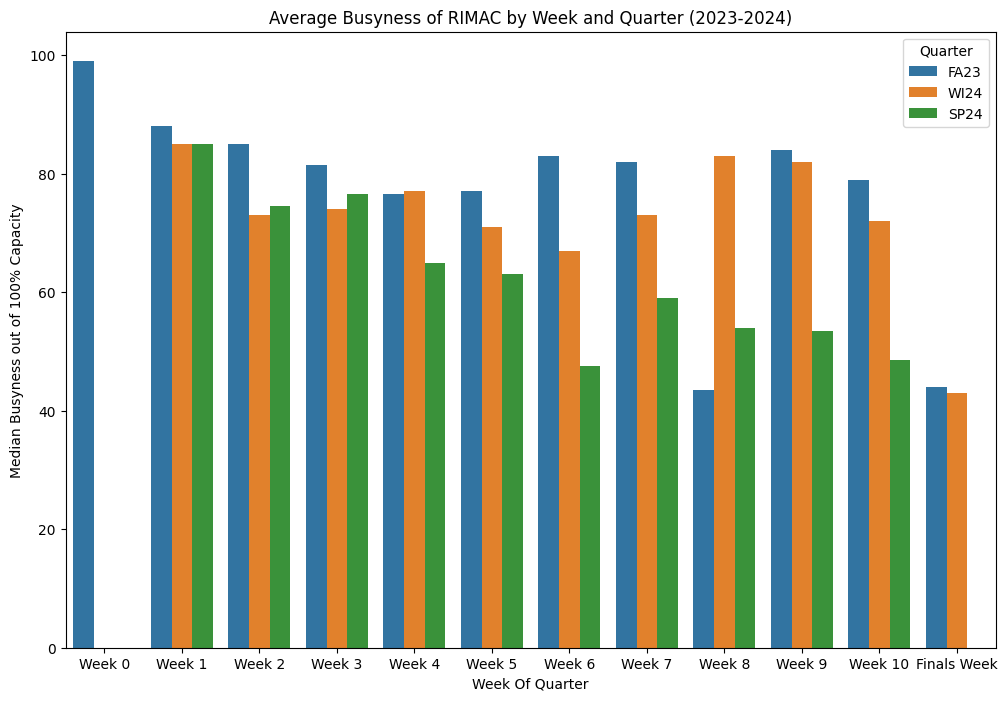

In [135]:
plt.figure(figsize=(12,8))
plt.ylabel("Median Busyness out of 100% Capacity")
plt.title("Average Busyness of RIMAC by Week and Quarter (2023-2024)")

week_order = [f"Week {i}" for i in range(11)] + ["Finals Week"]
sns.barplot(data=busyness_grouped, x = "Week Of Quarter", y = 'busyness_int', hue="Quarter", hue_order=['FA23', 'WI24', 'SP24'], order = week_order)

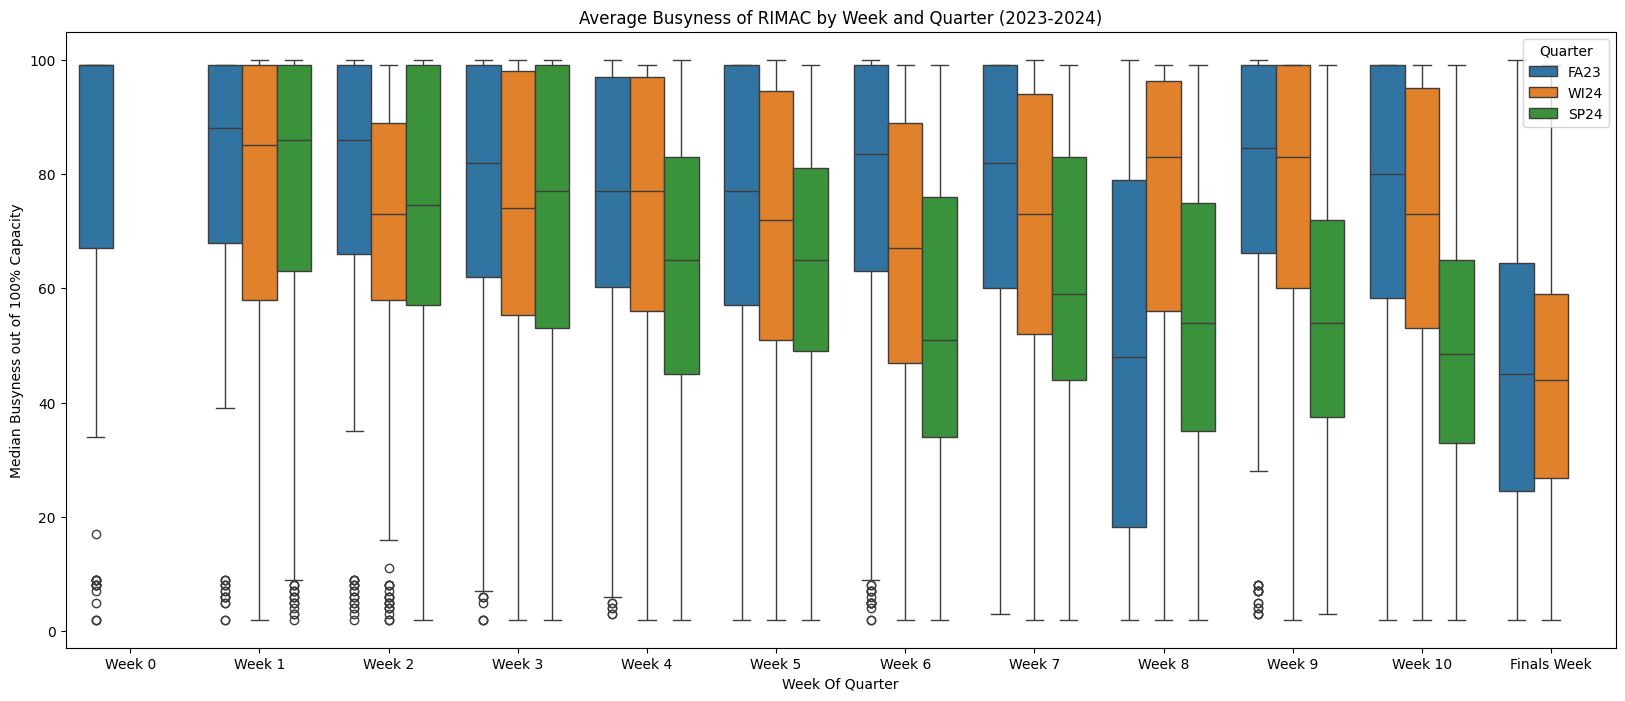

In [147]:
plt.figure(figsize=(20,8))
plt.ylabel("Median Busyness out of 100% Capacity")
plt.title("Average Busyness of RIMAC by Week and Quarter (2023-2024)")
f = sns.boxplot(data=rimac_df, x = "Week Of Quarter", y = "busyness_int", hue="Quarter", hue_order=['FA23', 'WI24', 'SP24'], order = week_order)
sns.move_legend(f, "upper right")

In [37]:
rimac_df

,date,time,busyness,month,day,year,busyness_int,Week Of Quarter
9701,7/20/2023,6:00:02 AM,0,7,20,2023,0,None
10769,9/17/2023,9:00:02 PM,0,9,17,2023,0,None
10771,9/17/2023,10:00:02 PM,0,9,17,2023,0,None
10788,9/18/2023,1:30:02 PM,0,9,18,2023,0,None
10804,9/18/2023,9:30:01 PM,0,9,18,2023,0,None
...,...,...,...,...,...,...,...,...
6891,4/25/2023,10:30:03 AM,100%,4,25,2023,100,None
5517,3/14/2023,9:30:02 AM,100%,3,14,2023,100,None
17508,4/12/2024,5:00:05 PM,100%,4,12,2024,100,None
5136,3/2/2023,2:00:03 PM,100%,3,2,2023,100,None


In [34]:
rimac_df['Week Of Quarter'].unique()

array([None], dtype=object)

<Axes: xlabel='Number of recorded busyness %', ylabel='Busyness %'>

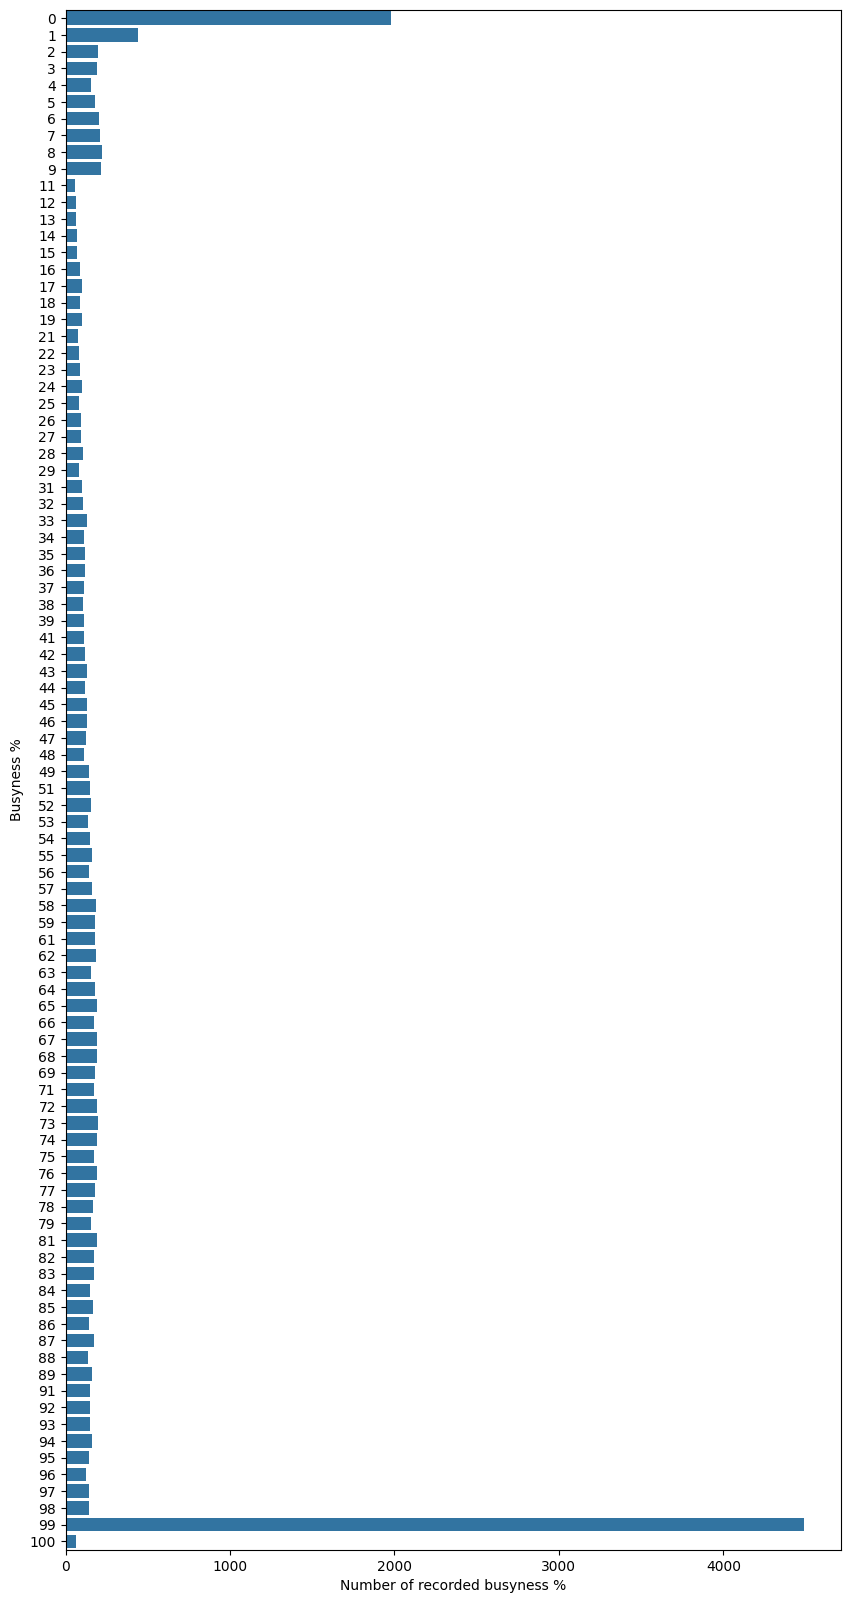

In [23]:
plt.figure(figsize=(10,20))
plt.ylabel("Busyness %")
plt.xlabel("Number of recorded busyness %")
sns.countplot(data=rimac_df, y="busyness_int")